## Notebook 5 - Setting the CosineScore threshold

This notebooks identifies a reasonable cutoff to call hits from our screening results.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('./tmp/Val_results_cosine_iteration_1.csv')

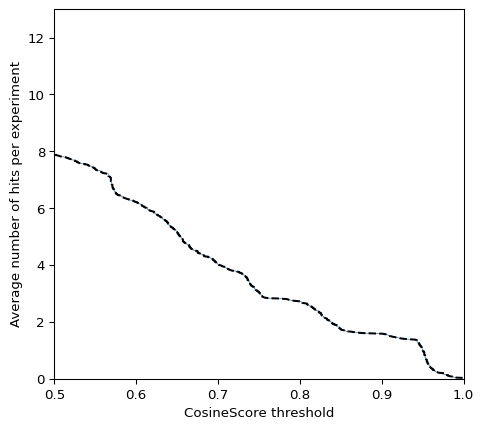

In [8]:
fig = plt.figure(figsize=(5.5, 5), dpi=96)
fig.patch.set_facecolor('white')


df_tmp = df

scores = df_tmp['CosineScore']
scores = np.sort(scores)

counts = np.array(range(len(scores),0,-1))
N = len(df_tmp['File'].unique())
counts_norm = counts / N

plt.plot(scores, counts_norm, linewidth = .5)

# Let us plot the average
scores = df['CosineScore']
scores = np.sort(scores)

counts = np.array(range(len(scores),0,-1))
N = len(df['File'].unique())
counts_norm = counts / N
plt.plot(scores, counts_norm, linewidth = 1.5, color='black', linestyle='dashed')

plt.xlim([0.5,1.0])
plt.ylim([0,13])

plt.xlabel('CosineScore threshold')
plt.ylabel('Average number of hits per experiment')

# plt.savefig(filepath_results + "/figures/Effect of score cutoff.png", dpi=300, bbox_inches='tight', pad_inches=0, facecolor='white')
plt.show()

Let us plot by adduct type:

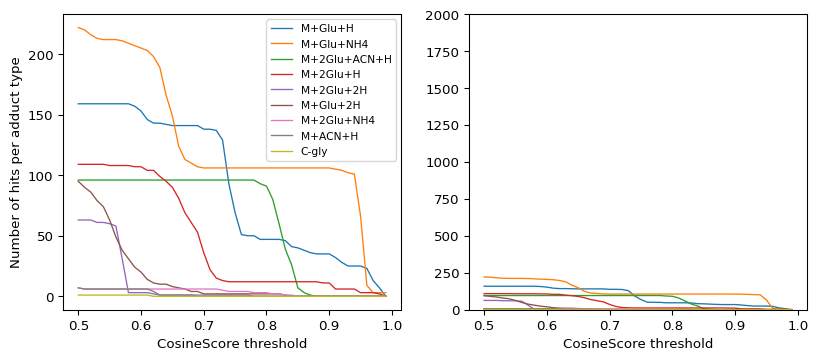

In [9]:
adducts = list(df['Adduct'].unique())
adducts.append('C-gly') # Let us plot the C-glucosides detected as well
scores = np.arange(0.5,1.0,0.01)
M = np.zeros((len(scores), len(adducts)))
for i,score in enumerate(scores):
    df_tmp = df[df['CosineScore']>=score]
    dict_counts = dict(df_tmp['Adduct'].value_counts())
    for j, adduct in enumerate(adducts):
        tmp = dict_counts.get(adduct)
        if tmp is not None:
            M[i,j] = tmp
    M[i,-1] = np.sum(df_tmp['C-gly'])

            
df_plot = pd.DataFrame(M, columns = adducts)
    
fig = plt.figure(figsize=(10, 4), dpi=96)
fig.patch.set_facecolor('white')

ax = fig.add_subplot(1, 2, 1)
for (columnName, columnData) in df_plot.items():
    plt.plot(scores, columnData.values, linewidth = 1.)
plt.legend(adducts, prop={'size': 8.})
plt.xlabel('CosineScore threshold')
plt.ylabel('Number of hits per adduct type')

ax = fig.add_subplot(1, 2, 2)
for (columnName, columnData) in df_plot.items():
    plt.plot(scores, columnData.values, linewidth = 1.)
plt.xlabel('CosineScore threshold')
plt.ylim([0,2000]);

Let us drop any rows with the same enzyme and name combination:

In [10]:
df

,File,Enzyme_id,Name,Rep,CSMILES,PrecursorMZ,Adduct,RT,CosineScore,C-gly,AUC,Substrate_used,MoNA_DB#
0,./mzML/73C5_GlycocholicAcid_1.mzML,73C5,GLYCOCHOLIC ACID,1,CC(CCC(=O)NCC(=O)O)C1CCC2C3C(O)CC4CC(O)CCC4(C)...,628.3738,M+Glu+H,528.93,0.989,False,179767.0,GlycocholicAcid,VF-NPL-QEHF025254
1,./mzML/73C5_GlycocholicAcid_1.mzML,73C5,DEOXYCHOLIC ACID,1,CC(CCC(=O)O)C1CCC2C3CCC4CC(O)CCC4(C)C3CC(O)C12C,572.3834,M+Glu+NH4,636.79,0.960,False,46008.0,GlycocholicAcid,VF-NPL-QEHF013890
2,./mzML/73C5_GlycocholicAcid_1.mzML,73C5,CHOLESTEROL (2GLC),1,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,752.5206,M+2Glu+ACN+H,833.18,0.812,False,247989.0,GlycocholicAcid,VF-NPL-QEHF011349
3,./mzML/73C5_GlycocholicAcid_1.mzML,73C5,SOLASODINE,1,CC1CCC2(NC1)OC1CC3C4CC=C5CC(O)CCC5(C)C4CCC3(C)...,576.4149,M+Glu+H,834.19,0.733,False,553279.0,GlycocholicAcid,VF-NPL-QEHF027390
4,./mzML/73C5_GlycocholicAcid_1.mzML,73C5,SOLASODINE (2GLC),1,CC1CCC2(NC1)OC1CC3C4CC=C5CC(O)CCC5(C)C4CCC3(C)...,738.4684,M+2Glu+H,763.09,0.693,False,71015.0,GlycocholicAcid,VF-NPL-QEHF027390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,./mzML/73C5_Cortisone_1.mzML,73C5,CORTISONE,1,CC12CCC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O)CO,523.2577,M+Glu+H,455.63,0.632,False,34389.0,Cortisone,VF-NPL-QEHF013899
754,./mzML/73C5_Cortisone_1.mzML,73C5,ARACHIDIC ACID,1,CCCCCCCCCCCCCCCCCCCC(=O)O,492.3930,M+Glu+NH4,1060.55,0.631,False,24626.0,Cortisone,HMDB0002212_ms_ms_2035
755,./mzML/73C5_Cortisone_1.mzML,73C5,SOLASODINE (2GLC),1,CC1CCC2(NC1)OC1CC3C4CC=C5CC(O)CCC5(C)C4CCC3(C)...,738.4686,M+2Glu+H,763.46,0.607,False,86417.0,Cortisone,VF-NPL-QEHF027390
756,./mzML/73C5_Cortisone_1.mzML,73C5,AVOCADYNE ACETATE (2GLC),1,C#CCCCCCCCCCCCC(O)CC(O)COC(C)=O,326.1990,M+2Glu+2H,861.65,0.566,False,25668.0,Cortisone,VF-NPL-QEHF013119


In [11]:
df = df.sort_values(by=['AUC'], ascending=[False]) # The sorting ensures we keep the highest AUC when dropping
df = df.drop_duplicates(subset=['Enzyme_id', 'Name'], keep='first')
df.reset_index(drop=True, inplace=True)

assert not any(df['AUC']<=0) # Sanity check
# df = df.query('AUC > 10_000').reset_index(drop=True).copy()

df['single_or_double'] = df['Name'].apply(lambda x: 'double' if " (2GLC)" in x  else 'single')
df['Name'] = df['Name'].str.replace(' (2GLC)', '')

len(df)

59

It appears that `0.85` is a good cutoff value. Let us filter `df` accordingly:

In [14]:
score_thresholds = [0.85]
for score_threshold in score_thresholds:
    df = df[df['CosineScore']>=score_threshold]
    df.reset_index(drop=True, inplace=True)

    # Pivoting the dataframe
    df_pivot = df.pivot(index=['File', 'Name', 'CSMILES', 'Enzyme_id'], columns='single_or_double', values=['CosineScore', 'RT', 'AUC', 'Adduct', 'C-gly','MoNA_DB#']).reset_index()

    # Flattening the column hierarchy
    df_pivot.columns = ['_'.join(col).strip('_') for col in df_pivot.columns.values]

    df_pivot['single_double'] = df_pivot.apply(
        lambda row: 'single_and_double' if row['AUC_single'] > 0 and row['AUC_double'] > 0 else (
            'single' if row['AUC_single'] > 0 else (
                'double' if row['AUC_double'] > 0 else None
            )
        ), axis=1
    )

    # Specifying the desired column order
    desired_order = ['File', 'Name', 'CSMILES', 'Enzyme_id', 'single_double',
                    'CosineScore_single', 'RT_single', 'AUC_single', 'Adduct_single', 'C-gly_single', 'MoNA_DB#_single', 
                    'CosineScore_double', 'RT_double', 'AUC_double', 'Adduct_double', 'C-gly_double','MoNA_DB#_double',]

    # Reordering the columns
    df_pivot = df_pivot[desired_order]

    # Save the results
    df_pivot.to_csv(f'./results/Val_results_CosineScore_{score_threshold}.csv', index=False) # for paper

    print(score_threshold)
    print(len(df_pivot))

0.85
22
